# K-Means clustering

Apprentissage non-supervisé.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

%matplotlib inline

# Combien de centroids?

Un détails peu discuté au début est le nombre de centroids à utiliser.
* Parameter sweep
* Overfitting / underfitting
* Elbow method


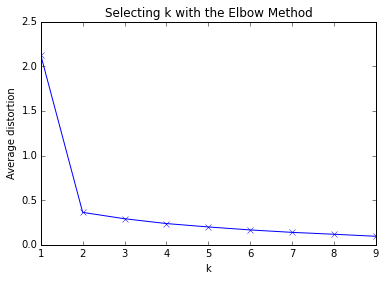

In [18]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
X = np.hstack((cluster1, cluster2)).T
# Et si on faisait...?
# X = np.vstack((cluster1, cluster2)).T

K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(
            cdist(X, kmeans.cluster_centers_, 'euclidean'), 
            axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()
